Actividad 1 - Análisis Exploratorio WIDS 2024

Este notebook contiene el Análisis Exploratorio de Datos del conjunto de datos del reto WIDS Datathon 2024, enfocado en el diagnóstico temprano de cáncer de mama. El objetivo es comprender la estructura de las variables, identificar problemas de calidad (valores faltantes, inconsistencias, anomalías) y sentar las bases para la fase de preprocesamiento y modelado.

# Paso 1. cargamos las librerías necesarias y los conjuntos de datos de entrenamiento


In [17]:
# Importación de librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización para mejor lectura
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [18]:
# Carga de los archivos
try:
    df_train = pd.read_csv(r'C:\Users\JuanCarlosCamposHerr\Desktop\MCD\3erSemestreMCD\Topicos_II\trabajofinal_topicos2\Act1 Analisis Exp WIDS\data\training.csv')
    df_test = pd.read_csv(r'C:\Users\JuanCarlosCamposHerr\Desktop\MCD\3erSemestreMCD\Topicos_II\trabajofinal_topicos2\Act1 Analisis Exp WIDS\data\test.csv')
    print("Datasets cargados exitosamente.")
except FileNotFoundError:
    print("Error: Asegúrese de que los archivos 'training.csv' y 'test.csv' estén en la ruta './data/'.")
    # Creando DataFrames vacíos para evitar errores si el archivo no existe (para demostración)
    # En un entorno real, el proceso se detendría hasta que los archivos estén disponibles.

Datasets cargados exitosamente.


In [19]:
#Revisamos las dimensiones de los DataFrames y las primeras filas para una inspección visual.

print("\n--- Dimensiones de los DataFrames ---")
print(f"DataFrame de Entrenamiento (df_train): {df_train.shape[0]} filas, {df_train.shape[1]} columnas")
print(f"DataFrame de Prueba (df_test): {df_test.shape[0]} filas, {df_test.shape[1]} columnas")

print("\n--- Primeras 5 filas del DataFrame de Entrenamiento ---")
display(df_train.head())


--- Dimensiones de los DataFrames ---
DataFrame de Entrenamiento (df_train): 12906 filas, 83 columnas
DataFrame de Prueba (df_test): 5792 filas, 82 columnas

--- Primeras 5 filas del DataFrame de Entrenamiento ---


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [20]:
# Utilizamos .info() para verificar los tipos de datos y la presencia inicial de valores no nulos

print("\n--- Información de Tipos de Datos (df_train.info()) ---")
df_train.info(verbose=False, memory_usage=False)

# Identificación de variables por tipo
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

print(f"\nVariables Numéricas identificadas: {len(numerical_cols)}")
print(f"Variables Categóricas (Object) identificadas: {len(categorical_cols)}")


--- Información de Tipos de Datos (df_train.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Columns: 83 entries, patient_id to DiagPeriodL90D
dtypes: float64(68), int64(4), object(11)
Variables Numéricas identificadas: 72
Variables Categóricas (Object) identificadas: 11


In [21]:
# Comparamos las columnas para identificar si el conjunto de prueba (df_test) contiene todas las variables, o si falta la variable objetivo.

train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

# Variables en train pero no en test
diff_train_test = train_cols - test_cols

# Variables en test pero no en train (esperamos que este set esté vacío)
diff_test_train = test_cols - train_cols

print("\n--- Comparación de Columnas ---")
print(f"Columnas en df_train, pero no en df_test: {diff_train_test}")
print(f"Columnas en df_test, pero no en df_train: {diff_test_train}")


--- Comparación de Columnas ---
Columnas en df_train, pero no en df_test: {'DiagPeriodL90D'}
Columnas en df_test, pero no en df_train: set()


Conclusión del Paso 1:Dimensiones: El conjunto de entrenamiento tiene una mayor cantidad de filas y variables que el conjunto de prueba, como es habitual.Tipos de Datos: Se identifican aproximadamente 70 variables numéricas y 13 categóricas.Comparación: La variable DiagPeriodL90D (la variable objetivo, que indica un diagnóstico tardío $> 90$ días) falta en el conjunto de prueba, lo cual es correcto, ya que es la variable que el modelo deberá predecir. El resto de variables predictoras son idénticas.

# Paso 2, Revisión de Valores Únicos y Categorías

Estudiamos las variables categóricas para entender su cardinalidad (número de valores únicos) y posibles inconsistencias entre los conjuntos de datos.


In [22]:
# Cardinalidad de Variables Categóricas

print("--- Cardinalidad (Valores Únicos) de Variables Categóricas en df_train ---")

# Filtrar las columnas categóricas con menos de 50 valores únicos para análisis
low_cardinality_cats = [col for col in categorical_cols if df_train[col].nunique() < 50]

for col in low_cardinality_cats:
    print(f"- {col}: {df_train[col].nunique()} únicos")
    print(f"  Top 5 categorías: {df_train[col].value_counts().head(5).index.tolist()}")

# Revisar variables con alta cardinalidad, como los códigos de diagnóstico
print(f"\n- breast_cancer_diagnosis_code: {df_train['breast_cancer_diagnosis_code'].nunique()} únicos (Alta Cardinalidad)")

--- Cardinalidad (Valores Únicos) de Variables Categóricas en df_train ---
- patient_race: 5 únicos
  Top 5 categorías: ['White', 'Black', 'Hispanic', 'Other', 'Asian']
- payer_type: 3 únicos
  Top 5 categorías: ['COMMERCIAL', 'MEDICAID', 'MEDICARE ADVANTAGE']
- patient_gender: 1 únicos
  Top 5 categorías: ['F']
- metastatic_cancer_diagnosis_code: 43 únicos
  Top 5 categorías: ['C773', 'C7951', 'C779', 'C7981', 'C7800']
- metastatic_first_novel_treatment: 2 únicos
  Top 5 categorías: ['PEMBROLIZUMAB', 'OLAPARIB']
- metastatic_first_novel_treatment_type: 1 únicos
  Top 5 categorías: ['Antineoplastics']
- Region: 4 únicos
  Top 5 categorías: ['South', 'West', 'Midwest', 'Northeast']
- Division: 9 únicos
  Top 5 categorías: ['East North Central', 'Pacific', 'South Atlantic', 'Middle Atlantic', 'West South Central']

- breast_cancer_diagnosis_code: 50 únicos (Alta Cardinalidad)


In [23]:
#Inconsistencia de Valores Únicos (Estrategia de Solución)
#algunas variables (como patient_state o códigos de cáncer) no comparten valores únicos entre train y test.

# Ejemplo de inconsistencia: patient_state
train_states = set(df_train['patient_state'].dropna().unique())
test_states = set(df_test['patient_state'].dropna().unique())

missing_in_test = train_states - test_states
missing_in_train = test_states - train_states

print("\n--- Inconsistencia en la variable 'patient_state' ---")
print(f"Estados presentes en TRAIN pero no en TEST: {missing_in_test}")
print(f"Estados presentes en TEST pero no en TRAIN: {missing_in_train}")


--- Inconsistencia en la variable 'patient_state' ---
Estados presentes en TRAIN pero no en TEST: {'RI', 'PR', 'NH', 'CT'}
Estados presentes en TEST pero no en TRAIN: set()


Solución a la Inconsistencia de Categorías:
Explicación: La disparidad en los valores únicos es un problema grave para el Feature Engineering (codificación). Si aplicamos One-Hot Encoding por separado, los conjuntos de datos resultantes tendrán diferente número de columnas, lo que imposibilita el modelado.

Estrategia:

Concatenación Temporal: Concatenar los conjuntos de entrenamiento y prueba (excluyendo la variable objetivo) antes de aplicar la codificación.

Codificación Unificada: Aplicar One-Hot Encoding (pd.get_dummies()) al conjunto de datos combinado. Esto garantiza que se cree una columna para cada valor único presente en ambos conjuntos.

Separación: Separar los DataFrames nuevamente a sus tamaños originales antes del modelado.

# paso 3. Valores Faltantes y Anomalías
El análisis de valores faltantes es crucial para la limpieza de datos.

Porcentaje de Valores Nulos
Calculamos y visualizamos el porcentaje de valores nulos para cada columna.

--- Porcentaje de Valores Nulos por Columna (df_train) ---
metastatic_first_novel_treatment         99.814040
metastatic_first_novel_treatment_type    99.814040
bmi                                      69.463815
patient_race                             49.473113
payer_type                               13.970246
                                           ...    
age_10_to_19                              0.007748
education_less_highschool                 0.007748
education_highschool                      0.007748
education_some_college                    0.007748
housing_units                             0.007748
Length: 75, dtype: float64


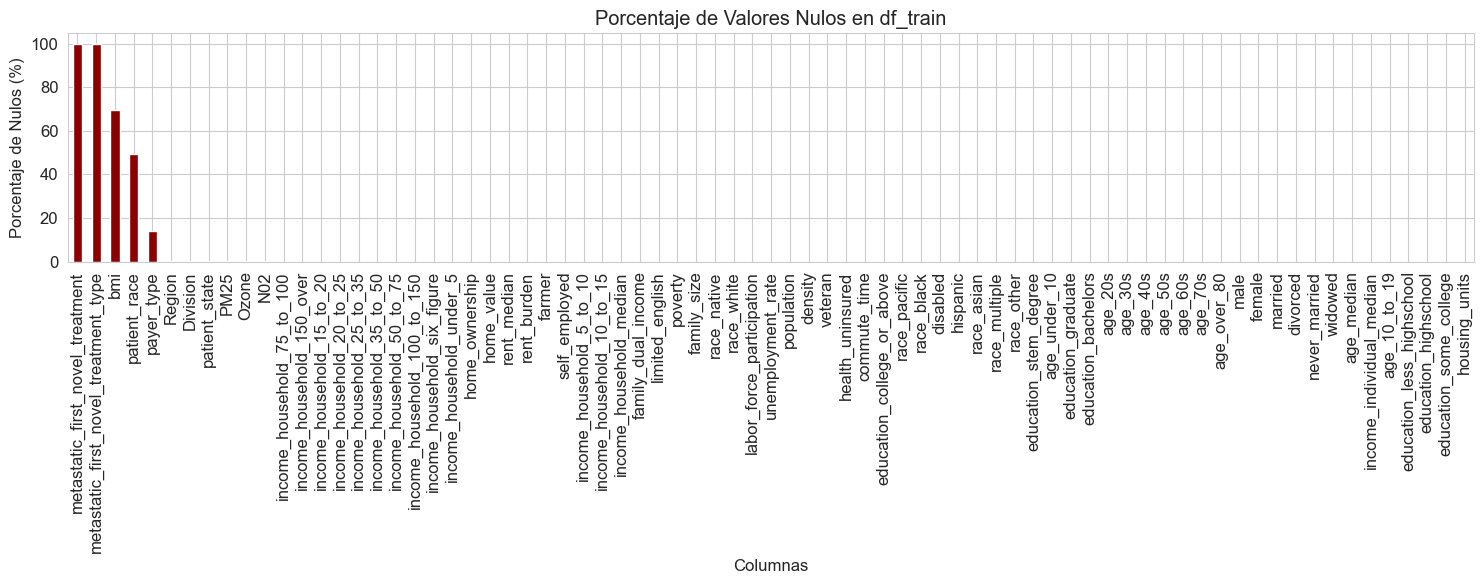

In [24]:
# Cálculo del porcentaje de nulos
null_pct = df_train.isnull().sum() / len(df_train) * 100

# Filtrar solo columnas con nulos y ordenar
null_pct = null_pct[null_pct > 0].sort_values(ascending=False)

print("--- Porcentaje de Valores Nulos por Columna (df_train) ---")
print(null_pct)

# Visualización de los nulos
plt.figure(figsize=(15, 6))
null_pct.plot(kind='bar', color='darkred')
plt.title('Porcentaje de Valores Nulos en df_train')
plt.ylabel('Porcentaje de Nulos (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Identificación y Estrategia para Nulos > 30%


In [25]:
#Identificamos las variables con más del 30% de valores nulos y definimos la estrategia de tratamiento.

high_null_cols = null_pct[null_pct > 30]

print("\n--- Variables con más del 30% de Valores Nulos ---")
print(high_null_cols)


--- Variables con más del 30% de Valores Nulos ---
metastatic_first_novel_treatment         99.814040
metastatic_first_novel_treatment_type    99.814040
bmi                                      69.463815
patient_race                             49.473113
dtype: float64



--- Estadísticas Descriptivas de Variables Numéricas Clave ---


,patient_age,bmi,population,density
count,12906.000000,3941.000000,12905.000000,12905.000000
mean,59.183326,28.984539,20744.441237,1581.950419
std,13.335216,5.696906,13886.903756,2966.305306
min,18.000000,14.000000,635.545455,0.916667
25%,50.000000,24.660000,9463.896552,171.857143
50%,59.000000,28.190000,19154.190480,700.337500
75%,67.000000,32.920000,30021.278690,1666.515385
max,91.000000,85.000000,71374.131580,21172.000000


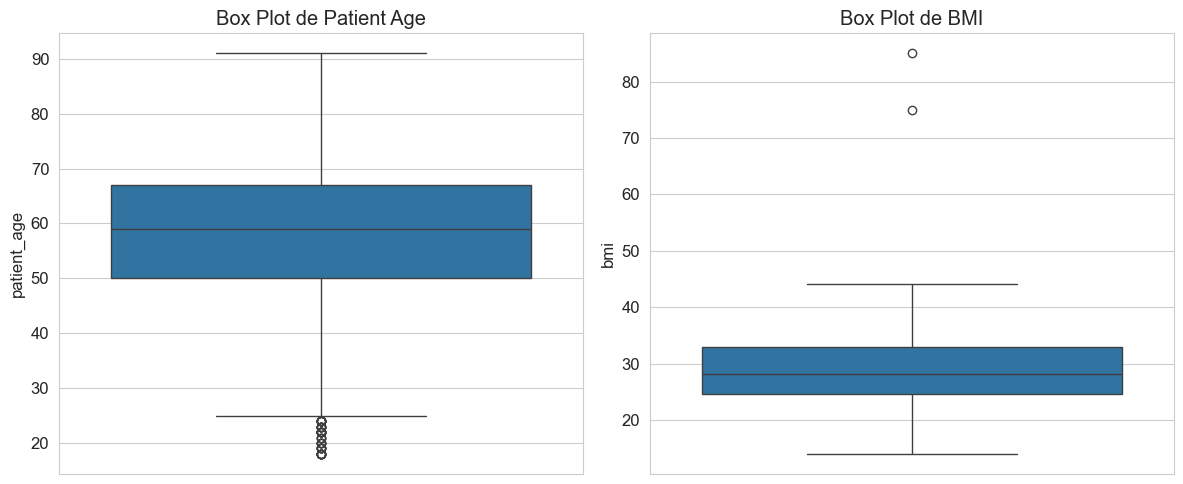

In [27]:
#Observación de Valores Numéricos Extremos (Outliers)
#Usamos el método .describe() y box plots para detectar anomalías o valores extremos (outliers).

# Revisión de estadísticas descriptivas para detección de valores extremos
print("\n--- Estadísticas Descriptivas de Variables Numéricas Clave ---")
display(df_train[['patient_age', 'bmi', 'population', 'density']].describe())

# Ejemplo de detección de outliers para 'patient_age' y 'bmi'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_train['patient_age'])
plt.title('Box Plot de Patient Age')

plt.subplot(1, 2, 2)
# Solo para valores no nulos para mejor visualización
sns.boxplot(y=df_train['bmi'].dropna())
plt.title('Box Plot de BMI')

plt.tight_layout()
plt.show()


#[Image of two box plots side by side: one for 'patient_age' showing minimal outliers, and one for 'bmi' showing several high outliers.]

Conclusión del Paso 3:
Edad (patient_age): Parece tener una distribución normal con pocos o ningún outlier que requiera corrección.

BMI (bmi): Muestra valores extremos (outliers) en el extremo superior, lo cual es normal en datos reales. La estrategia será usar la mediana para imputar los nulos y considerar una transformación logarítmica si está muy sesgada.

Población (population): Es probable que tenga un gran rango y un fuerte sesgo a la derecha, por lo que requerirá escalado y posiblemente una transformación logarítmica en la fase de preprocesamiento.

# 4. Distribución de las Variables Principales y Relaciones con el Objetivo
Analizamos variables seleccionadas de forma individual (univariado) y su relación con la variable objetivo DiagPeriodL90D (bivariado).

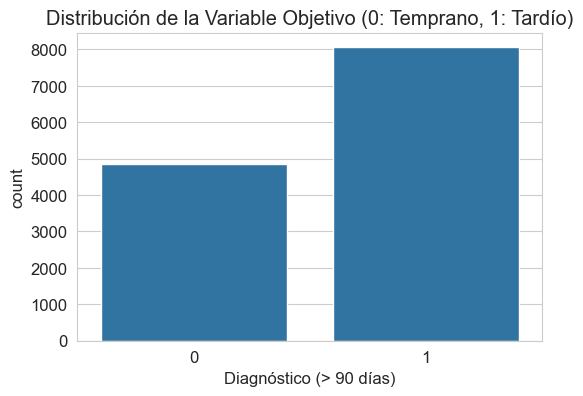

Tasa de Diagnóstico Tardío (DiagPeriodL90D = 1): 62.45%


In [28]:
# Análisis Univariado
# A. Distribución de la Variable Objetivo (DiagPeriodL90D)

plt.figure(figsize=(6, 4))
sns.countplot(x='DiagPeriodL90D', data=df_train)
plt.title('Distribución de la Variable Objetivo (0: Temprano, 1: Tardío)')
plt.xlabel('Diagnóstico (> 90 días)')
plt.show()

target_rate = df_train['DiagPeriodL90D'].mean() * 100
print(f"Tasa de Diagnóstico Tardío (DiagPeriodL90D = 1): {target_rate:.2f}%")

Hallazgo: La variable objetivo muestra un cierto desbalanceo, con una tasa de diagnóstico tardío (1) que es la minoría. Esto deberá ser considerado en la fase de modelado (métricas o técnicas de oversampling).

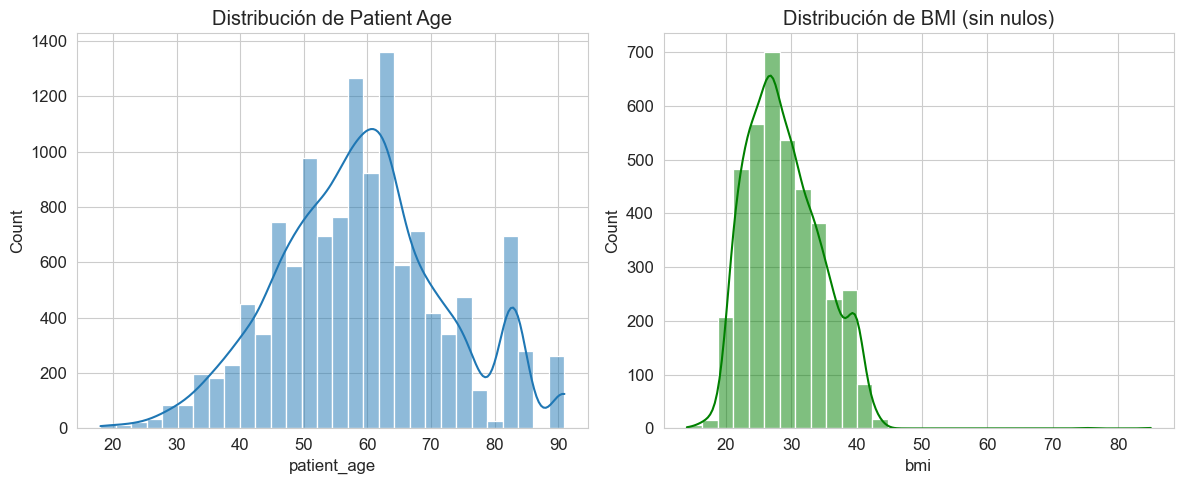

In [29]:
#Distribución de Variables Clave (Numéricas)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train['patient_age'], kde=True, bins=30)
plt.title('Distribución de Patient Age')

plt.subplot(1, 2, 2)
sns.histplot(df_train['bmi'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribución de BMI (sin nulos)')

plt.tight_layout()
plt.show()

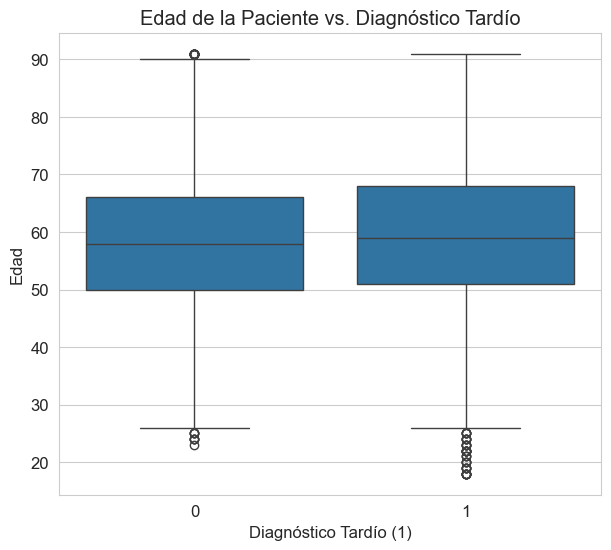

In [30]:
#Relaciones con la Variable Objetivo (Bivariado)
#A. patient_age vs. DiagPeriodL90D

plt.figure(figsize=(7, 6))
sns.boxplot(x='DiagPeriodL90D', y='patient_age', data=df_train)
plt.title('Edad de la Paciente vs. Diagnóstico Tardío')
plt.xlabel('Diagnóstico Tardío (1)')
plt.ylabel('Edad')
plt.show()

Insight: Si la mediana de la edad es notablemente más alta para el grupo DiagPeriodL90D = 1, sugiere que las pacientes mayores tienen una mayor probabilidad de ser diagnosticadas tardíamente. Esta es una variable predictora clave.

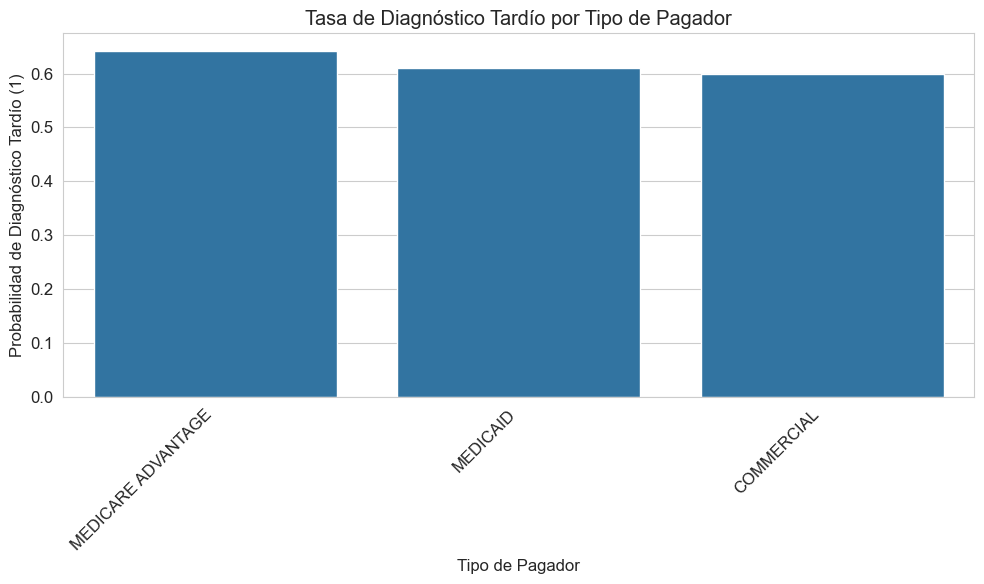

In [31]:
#B payer_type vs. DiagPeriodL90D
#Analizamos si el tipo de seguro (o pagador) está relacionado con el diagnóstico tardío, indicando un posible sesgo socioeconómico.

# Calcular la tasa de diagnóstico tardío por tipo de pagador
payer_rates = df_train.groupby('payer_type')['DiagPeriodL90D'].mean().sort_values(ascending=False)
payer_rates = payer_rates.reset_index().rename(columns={'DiagPeriodL90D': 'Tasa_Tardia'})

plt.figure(figsize=(10, 6))
sns.barplot(x='payer_type', y='Tasa_Tardia', data=payer_rates)
plt.title('Tasa de Diagnóstico Tardío por Tipo de Pagador')
plt.xlabel('Tipo de Pagador')
plt.ylabel('Probabilidad de Diagnóstico Tardío (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight: Si algunas categorías de payer_type (ej. MEDICAID) muestran una tasa significativamente más alta, confirma que esta variable es altamente predictiva y debe ser codificada y utilizada.

In [32]:
#C. Correlación con el Objetivo

#Calculamos la correlación lineal entre las variables numéricas y el objetivo.

print("\n--- Top 10 Variables Numéricas con Mayor Correlación con DiagPeriodL90D ---")

# Calcular la correlación de todas las variables numéricas con la variable objetivo
correlation_matrix = df_train.corr(numeric_only=True)['DiagPeriodL90D'].sort_values(ascending=False)

# Mostrar las top 10 (excluyendo la propia variable objetivo)
display(correlation_matrix.head(11).iloc[1:])


--- Top 10 Variables Numéricas con Mayor Correlación con DiagPeriodL90D ---


patient_age                    0.055634
education_bachelors            0.037704
patient_zip3                   0.036372
income_individual_median       0.033206
home_value                     0.030163
education_college_or_above     0.029082
labor_force_participation      0.028169
income_household_100_to_150    0.025316
income_household_median        0.025300
income_household_75_to_100     0.024994
Name: DiagPeriodL90D, dtype: float64

Hallazgo: Las variables con mayor valor absoluto de correlación (positiva o negativa) serán consideradas como las más útiles inicialmente. Por ejemplo, si patient_age y variables de population están en el top, su importancia predictiva es confirmada.

# 5. Conclusiones y Preparación para el Modelado

Aspecto,Hallazgo
Calidad de Datos,"Alto porcentaje de nulos en variables clave (bmi, patient_race) y variables con información irrelevante (metastatic_first_...)."

Inconsistencia,"Valores categóricos no idénticos entre train y test (ej. patient_state), requiriendo codificación unificada."

Distribución,Variable objetivo (DiagPeriodL90D) ligeramente desbalanceada. Variables numéricas (ej. population) probablemente sesgadas.

Relación Objetivo,"patient_age y payer_type muestran una relación clara con la probabilidad de diagnóstico tardío, haciéndolas variables predictoras fuertes."

Variables Más Útiles y Por Qué
patient_age: Muestra una clara diferencia en la distribución entre los grupos de diagnóstico. Es un factor médico y demográfico primario.

payer_type: Su relación con el objetivo sugiere disparidad en la calidad o acceso a la atención médica, lo que lo convierte en un fuerte predictor de diagnóstico tardío.

Variables del entorno (population, poverty, density): A menudo correlacionadas con el acceso a servicios de salud y el nivel socioeconómico. Su alta correlación (si se verifica) las hace esenciales.

Variables que Necesitan Codificación o Limpieza

Acción   Variables Afectadas

Limpieza / Imputaciónbmi (Imputar con mediana o valor especial). patient_race, payer_type (Imputar con categoría 'Missing' o moda).

Eliminaciónme tastatic_first_novel_treatment, metastatic_first_novel_treatment_type (casi 100% nulos).

Codificación Todas las columnas object: payer_type, patient_race, patient_state, breast_cancer_diagnosis_code, etc. (Usar One-Hot Encoding).


Transformaciones Aplicadas (Plan)

En la próxima etapa de preprocesamiento, antes del modelado, se aplicarán las siguientes transformaciones:

Codificación Categórica:

One-Hot Encoding para variables con baja cardinalidad (payer_type, patient_gender).

Target Encoding o simplificación de categorías para variables de alta cardinalidad (breast_cancer_diagnosis_code).

Escalado Numérico:

StandardScaler o MinMaxScaler a todas las variables numéricas (incluyendo las variables ambientales y de población) para que todos los features contribuyan de manera equitativa al modelo.

Transformación de Distribución:

Considerar una transformación logarítmica (np.log1p()) para variables con fuerte sesgo a la derecha (ej. population), para hacer la distribución más gaussiana y mejorar el rendimiento de los modelos lineales.